In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix

In [177]:
root_folder = "/Users/alvaroleal/Desktop/DS/Zrive"

df_feature_frame = pd.read_csv(root_folder + '/feature_frame.csv')
df_feature_frame.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [178]:
def deep_view(df):
    for columna in df.columns:
        print(f"Análisis de la columna: {columna}")

        if pd.api.types.is_numeric_dtype(df[columna]):
            print("Tipo: Numérica")
            print(f"Media: {df[columna].mean()}")
        else:
            print("Tipo: Categórica/Texto")

        print(f"Número total de valores: {df[columna].size}")
        print(f"Número de valores nulos: {df[columna].isnull().sum()}")

        valores_unicos = df[columna].value_counts()
        print(f"Número de valores únicos: {len(valores_unicos)}")

        print("\n" + "-"*50 + "\n")

deep_view(df_feature_frame)

Análisis de la columna: variant_id
Tipo: Numérica
Media: 34012501571575.29
Número total de valores: 2880549
Número de valores nulos: 0
Número de valores únicos: 976

--------------------------------------------------

Análisis de la columna: product_type
Tipo: Categórica/Texto
Número total de valores: 2880549
Número de valores nulos: 0
Número de valores únicos: 62

--------------------------------------------------

Análisis de la columna: order_id
Tipo: Numérica
Media: 2978388142421.595
Número total de valores: 2880549
Número de valores nulos: 0
Número de valores únicos: 3446

--------------------------------------------------

Análisis de la columna: user_id
Tipo: Numérica
Media: 3750025089859.796
Número total de valores: 2880549
Número de valores nulos: 0
Número de valores únicos: 1937

--------------------------------------------------

Análisis de la columna: created_at
Tipo: Categórica/Texto
Número total de valores: 2880549
Número de valores nulos: 0
Número de valores únicos: 344

In [179]:
df_feature_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

Se observa una cantidad muy reducida de valores únicos en 'order_id', lo cual resulta notable bajo la premisa de que esta métrica denota una combinación única de 'variant_id' y 'user_id' a lo largo del tiempo. Al tener 2.8M de pedidos esto implicaría un promedio de 836 elementos por pedido, una cifra inusualmente alta para las operaciones típicas de un supermercado.

Vamos a asegurarnos de que esta asunción es correcta:

In [180]:
df_feature_frame['order_id'].value_counts()

order_id
3643301986436    976
3643199160452    976
3642856079492    976
3642900349060    976
3642919485572    976
                ... 
2808434524292    614
2808393957508    611
2808099078276    608
2808027644036    608
2807985930372    608
Name: count, Length: 3446, dtype: int64

In [181]:
filtered_rows = df_feature_frame.loc[df_feature_frame['order_id'] == 3643301986436]
unique_values_count = {column: filtered_rows[column].value_counts() for column in filtered_rows.columns}
for column, counts in unique_values_count.items():
    print(f"Conteo de valores únicos para {column}:\n{counts}\n")

Conteo de valores únicos para variant_id:
variant_id
33826472919172    1
34457368100996    1
34081589362820    1
34081589297284    1
33951140085892    1
                 ..
33863279640708    1
33826461876356    1
33826456666244    1
33826422915204    1
33826439594116    1
Name: count, Length: 976, dtype: int64

Conteo de valores únicos para product_type:
product_type
tinspackagedfoods          75
condimentsdressings        39
ricepastapulses            38
cookingingredientsoils     35
longlifemilksubstitutes    35
                           ..
premixedcocktails           3
petcare                     3
windowglasscleaner          3
airfreshener                3
householdsundries           2
Name: count, Length: 62, dtype: int64

Conteo de valores únicos para order_id:
order_id
3643301986436    976
Name: count, dtype: int64

Conteo de valores únicos para user_id:
user_id
3914253959300    976
Name: count, dtype: int64

Conteo de valores únicos para created_at:
created_at
2021-03-03 14:42

Parece que nuestra suposición era acertada, dado que en el dataframe, el 'user_id', la fecha, y demás siempre son los mismos. Sin embargo, pensar que esto representa la cesta final de compra del usuario podría ser un error, ya que el outcome de la compra no se mantiene constante a lo largo del dataframe. Podría tratarse de los artículos que el usuario añade a su cesta pero luego decide no comprar, o quizás sea un historial de compras del cliente. Sería bueno consultar con el equipo de negocio para aclararlo.

In [182]:
df_feature_frame = df_feature_frame.assign(
    created_at=lambda x: pd.to_datetime(x['created_at']),
    order_date=lambda x: pd.to_datetime(x['order_date'])
)

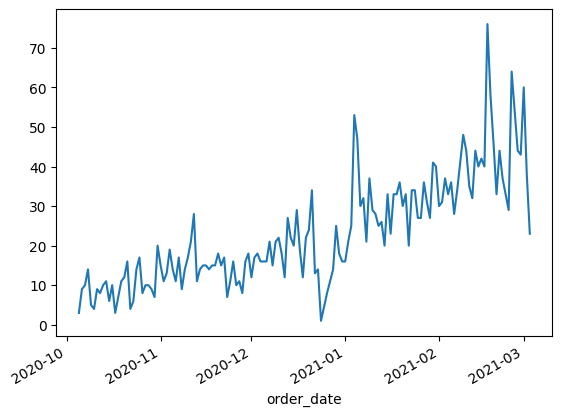

In [183]:
daily = df_feature_frame.groupby('order_date').order_id.nunique()
daily.plot(kind='line')
plt.show()

Hay una tendencia clara en toda nuestra muestra, así que tiene sentido hacer una división por periodos de tiempo para analizarla mejor.

## Milestone 1: exploration phase

Given that we have a clear understanding of our data, we just jump directly on building the predictive model.
- Firstly, we filter the data to only those orders with 5 items or more to build a dataset to work with.
- Secondly, since we want to have a POC in a very short timeframe, we will limit ourselves to using linear models which we will evaluate using train/validation/test split.

The outcome is expected to be a report/notebook/documentation on what worked and what did not and whys Most importantly, we need to have a final model selected to move to milestone 2.

In [184]:
len(df_feature_frame)

2880549

In [185]:
min_products = 5
order_size = df_feature_frame.groupby('order_id')['outcome'].sum()
orders_of_min_size = order_size[order_size >= min_products].index
df_filtered = df_feature_frame[df_feature_frame['order_id'].isin(orders_of_min_size)]

len(df_filtered)

2163953

In [186]:
info_cols = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']
label_col = 'outcome'
features_cols = [col for col in df_filtered.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [187]:
df_filtered[numerical_cols].dtypes

user_order_seq                        int64
normalised_price                    float64
discount_pct                        float64
global_popularity                   float64
count_adults                        float64
count_children                      float64
count_babies                        float64
count_pets                          float64
people_ex_baby                      float64
days_since_purchase_variant_id      float64
avg_days_to_buy_variant_id          float64
std_days_to_buy_variant_id          float64
days_since_purchase_product_type    float64
avg_days_to_buy_product_type        float64
std_days_to_buy_product_type        float64
dtype: object

In [188]:
df_filtered = df_filtered.sort_values('created_at')

order_ids = df_filtered['order_id'].unique()

total_ids = len(order_ids)
train_end = int(total_ids * 0.7)
val_end = train_end + int(total_ids * 0.15)

train_order_ids = order_ids[:train_end]
val_order_ids = order_ids[train_end:val_end]
test_order_ids = order_ids[val_end:]

train_df = df_filtered[df_filtered['order_id'].isin(train_order_ids)]
val_df = df_feature_frame[df_feature_frame['order_id'].isin(val_order_ids)]
test_df = df_feature_frame[df_feature_frame['order_id'].isin(test_order_ids)]

print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 1446691
Validation set size: 347233
Test set size: 370029


In [189]:
def feature_label_split(df, label_col):
    return df.drop(label_col, axis=1), df[label_col]

X_train, y_train = feature_label_split(train_df, label_col)
X_val, y_val = feature_label_split(val_df, label_col)
X_test, y_test = feature_label_split(test_df, label_col)

In [190]:
"""""Función para crear los gráficos del performance de nuestro modelo"""
def plot_metrics(model_name, y_pred, y_test, figsize=(10, 7)):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.astype(np.int64), np.rint(y_pred).astype(np.int64))
    conf_matrix = confusion_matrix(y_test.astype(np.int64), np.rint(y_pred).astype(np.int64))

    fig, ax = plt.subplots(2, 2, figsize=figsize)  # 2x2 para incluir la matriz de confusión

    ax[0, 0].plot(recall, precision, label=f"{model_name} AUC: {pr_auc:.2f}")
    ax[0, 0].set_xlabel("Recall")
    ax[0, 0].set_ylabel("Precision")
    ax[0, 0].set_title(f"Precision-Recall Curve")
    ax[0, 0].legend()

    ax[0, 1].plot(fpr, tpr, label=f"AUC: {roc_auc:.2f}")
    ax[0, 1].set_xlabel("FPR")
    ax[0, 1].set_ylabel("TPR")
    ax[0, 1].set_title(f"ROC Curve")
    ax[0, 1].legend()

    ax[1, 0].axis('off')  # No se necesita eje para mostrar texto
    ax[1, 0].text(0.5, 0.5, f"Accuracy: {accuracy:.2f}", fontsize=15, ha='center')

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1, 1])
    ax[1, 1].set_title("Confusion Matrix")
    ax[1, 1].set_xlabel("Predicted label")
    ax[1, 1].set_ylabel("True label")

    plt.tight_layout()
    plt.show()
    

## Milestone 2: MVP code

Using the outcomes of milestone 1 MVP ready code must be generated to share with the engineering team for deployment. For now, as this is just the MVP, we just want to make sure that we have production-ready code for our pipeline.
Some of the steps that should be present in such a pipeline are:
1. Data loading: loads data and applies validations if required.
2. Pre-processing: responsible of any pre-processing step that may be required.
3. Model training/selection: If applicable train model with different parameters and evaluate their performance to choose the best performing one. Trains a final model and save it to disk to be later used for inference. Since we are not using any ML Engineering Framework, think what is a good standard to save the trained models so we can keep track of the history of the models.

### Modelo 1 - Baseline

Usaremos entre modelo como benchmark a la hora de crear nuestras regresiones logísticas. Para ello usaremos el feature de "global_popularity" para decidir si el order puede ser comprado o no.

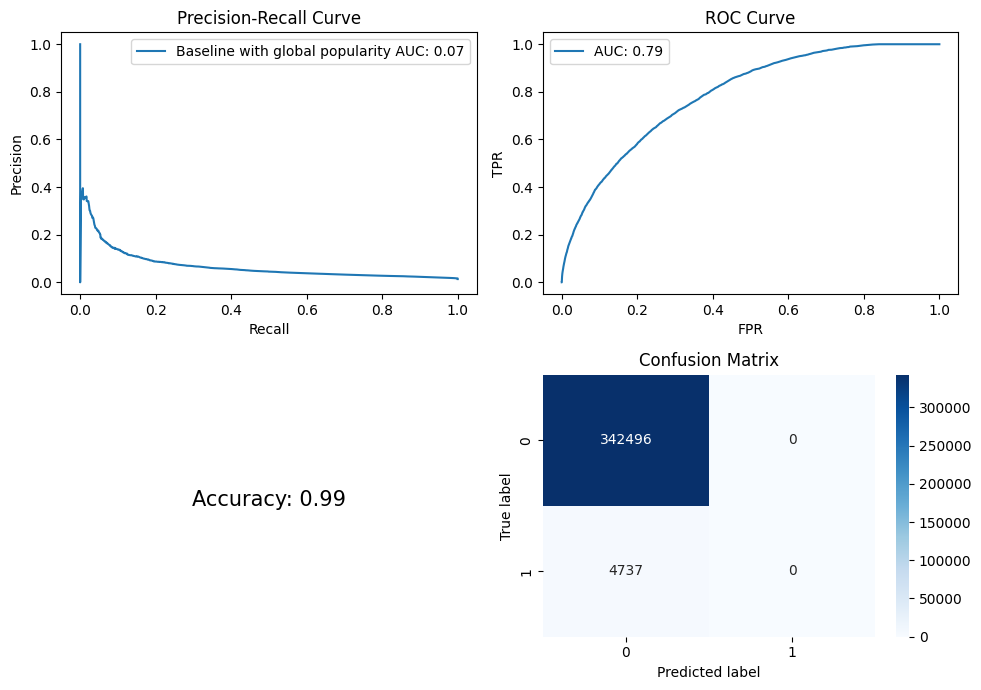

In [191]:
plot_metrics("Baseline with global popularity",val_df["global_popularity"],val_df[label_col])

Ahora que tenemos un modelo base muy simple nuestro objetivo va a ser superarlo a través de regresiones logísticas

### Modelo 2 - Simple Ridge regression without categorical variables

Comenzaremos entrenando un modelo Ridge sin incluir las variables categoricas ya que el preprocesado de estas sería mas tedioso y buscamos conseguir un modelo que funcione en un periodo corto de tiempo.

In [192]:
train_cols = numerical_cols + binary_cols

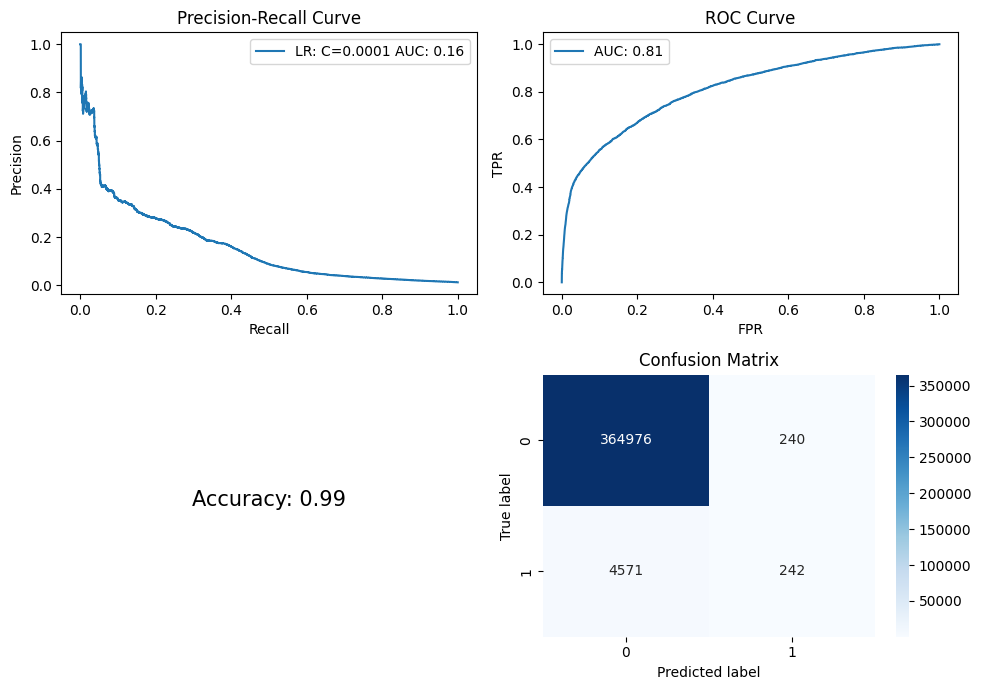

In [193]:
regularization_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

best_auc = 0
best_c = None
best_model = None

for c in regularization_values:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l2',C=c)
    )
    lr.fit(X_train[train_cols], y_train)

    y_proba = lr.predict_proba(X_test[train_cols])[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_c = c
        best_model = lr

y_pred = best_model.predict_proba(X_test[train_cols])[:, 1]

plot_metrics(f"LR: C={best_c}", y_pred, y_test)

Ya tenemos un modelo, que supera el rendimiento del modelo baseline. Para mejorarlo, vamos a revisar el equilibrio de sus coeficientes y ver si simplificarlo puede aumentar su eficiencia. A continuación, creamos una función para hacer más sencillo este proceso:

In [194]:
def show_coeffs(X_train, y_train, train_cols, penalty, C, solver):
    lr = Pipeline([
        ("standard_scaler", StandardScaler()),
        ("lr", LogisticRegression(penalty=penalty, C=C, solver=solver))
    ])
    lr.fit(X_train[train_cols], y_train)
    
    lr_coeff = pd.DataFrame({
        "features": train_cols,
        "importance": np.abs(lr.named_steps["lr"].coef_[0]),
        "regularisation": [penalty] * len(train_cols)
    })
    
    lr_coeff = lr_coeff.sort_values('importance', ascending=False)
    
    sns.barplot(data=lr_coeff, x="importance", y="features", hue="regularisation")
    plt.show()

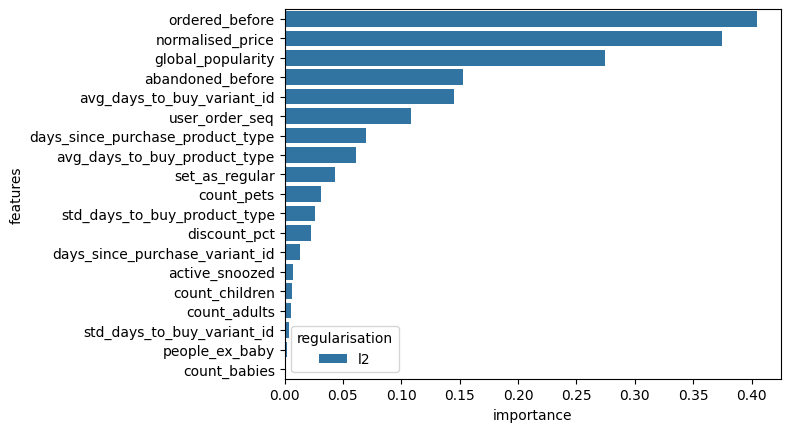

In [195]:
show_coeffs(X_train, y_train, train_cols, 'l2', 10, 'lbfgs')

### Modelo 3 - Simple Ridge regression without categorical variables / Only with the 3 main variables

Observamos que existen tres coeficientes bastante más significativos que el resto por lo que trataremos que simplificar el modelo usando solamente esos tres coeficientes.

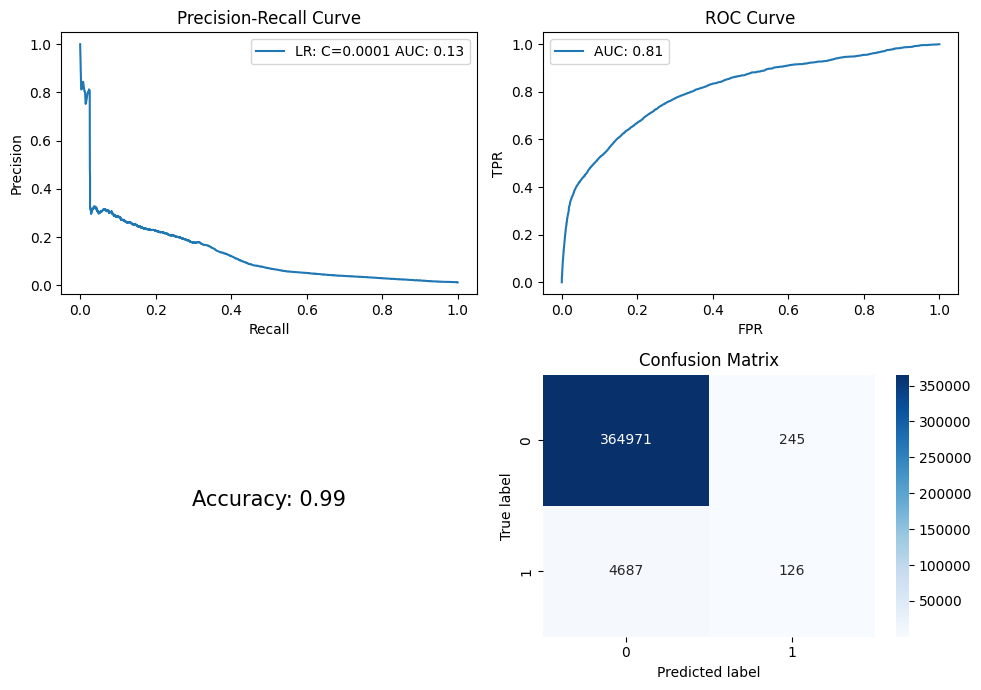

In [197]:
train_cols = ['ordered_before', 'normalised_price', 'global_popularity']

regularization_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

best_auc = 0
best_c = None
best_model = None

for c in regularization_values:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l2',C=c)
    )
    lr.fit(X_train[train_cols], y_train)

    y_proba = lr.predict_proba(X_test[train_cols])[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_c = c
        best_model = lr

y_pred = best_model.predict_proba(X_test[train_cols])[:, 1]

plot_metrics(f"LR: C={best_c}", y_pred, y_test)

### Modelo 4 - Simple Ridge regression without categorical variables / Removing variables below 0.02 importance

Al eliminar estos tres coeficientes, no vimos mejora en nuestras curvas. Aun así, buscando optimizar y simplificar nuestro modelo, vamos a intentar eliminar aquellos con una importancia menor a 0.02.

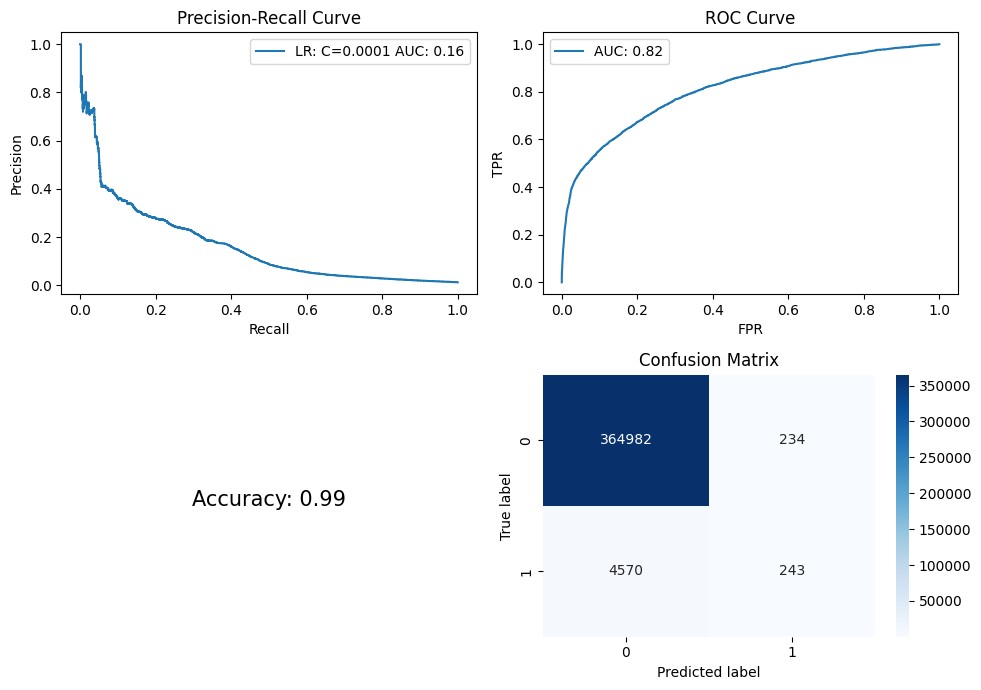

In [198]:
train_cols = ["days_since_purchase_variant_id", "discount_pct", "std_days_to_buy_product_type", "count_pets", "set_as_regular", "avg_days_to_buy_product_type", "days_since_purchase_product_type", "user_order_seq", "avg_days_to_buy_variant_id", "abandoned_before", "global_popularity", "normalised_price", "ordered_before",]

regularization_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

best_auc = 0
best_c = None
best_model = None

for c in regularization_values:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l2',C=c)
    )
    lr.fit(X_train[train_cols], y_train)

    y_proba = lr.predict_proba(X_test[train_cols])[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_c = c
        best_model = lr

y_pred = best_model.predict_proba(X_test[train_cols])[:, 1]

plot_metrics(f"LR: C={best_c}", y_pred, y_test)

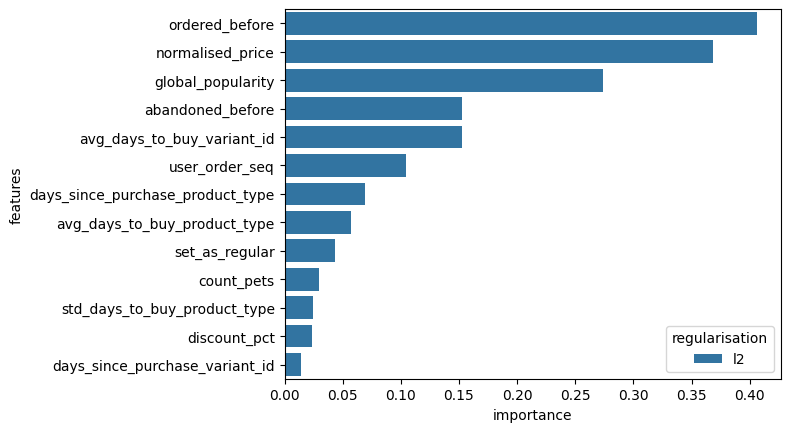

In [199]:
show_coeffs(X_train, y_train, train_cols, 'l2', 10, 'lbfgs')

Con este pequeño ajuste, no solo logramos simplificar el modelo, sino que también mejoramos su precisión, como se refleja en el aumento de la AUC de la curva Precision-Recall.

### Modelo 5 - Lasso regression without categorical variables

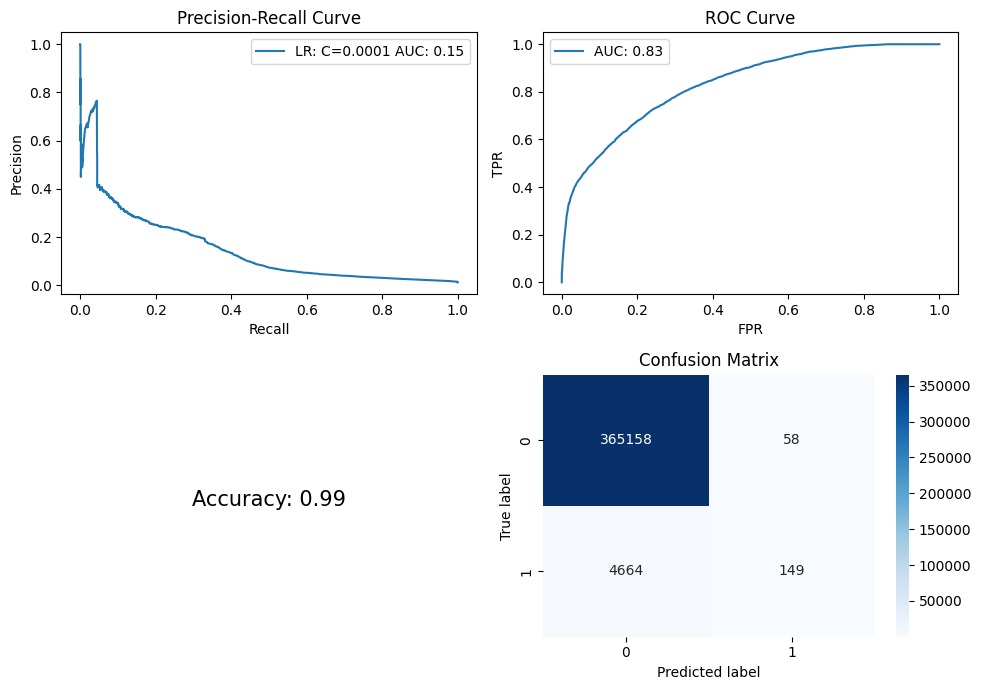

In [200]:
train_cols = numerical_cols + binary_cols

regularization_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

best_auc = 0
best_c = None
best_model = None

for c in regularization_values:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l1',C=c, solver='liblinear')
    )
    lr.fit(X_train[train_cols], y_train)

    y_proba = lr.predict_proba(X_test[train_cols])[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_c = c
        best_model = lr

y_pred = best_model.predict_proba(X_test[train_cols])[:, 1]

plot_metrics(f"LR: C={best_c}", y_pred, y_test)

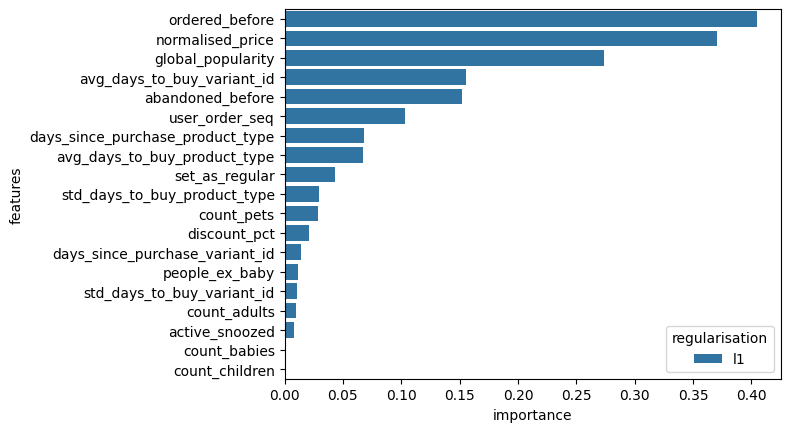

In [203]:
show_coeffs(X_train, y_train, train_cols, 'l1', 10, 'liblinear')

### Modelo 6 - Lasso regression without categorical variables / Only with the 3 main variables

Para ver todas las posibilidades y aún sabiendo que muy probablemente se repitan los resultados anteriores y este modelo no supere al anterior, vamos a probar a entrenarlo con las tres variables más importantes.

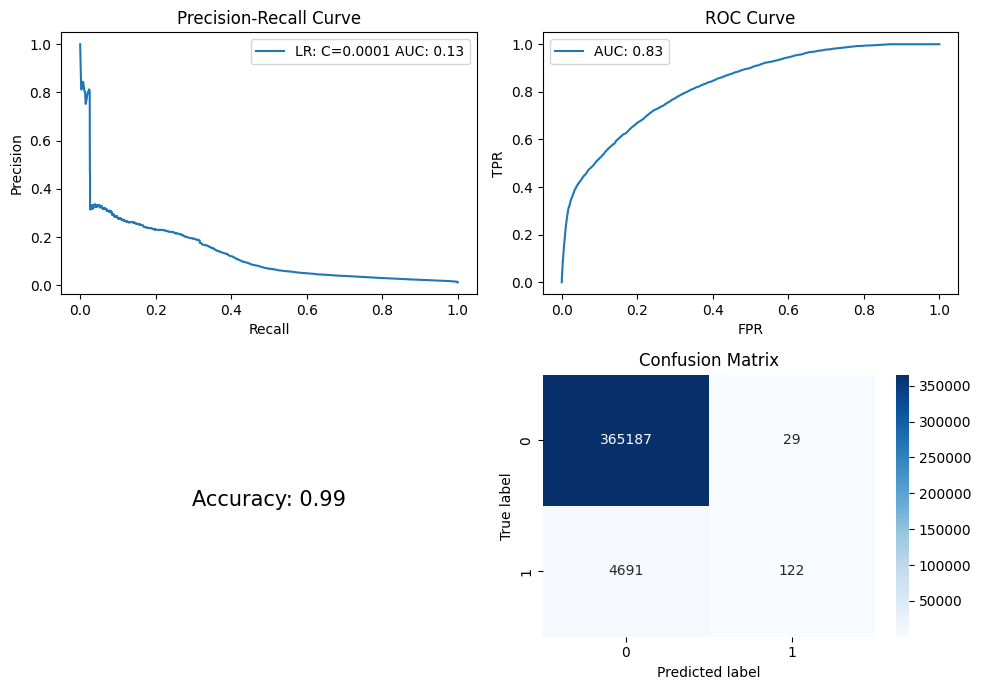

In [206]:
train_cols = ['ordered_before', 'normalised_price', 'global_popularity']

regularization_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

best_auc = 0
best_c = None
best_model = None

for c in regularization_values:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l1',C=c, solver='liblinear')
    )
    lr.fit(X_train[train_cols], y_train)

    y_proba = lr.predict_proba(X_test[train_cols])[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_c = c
        best_model = lr

y_pred = best_model.predict_proba(X_test[train_cols])[:, 1]

plot_metrics(f"LR: C={best_c}", y_pred, y_test)

### Modelo 7 - Lasso regression without categorical variables / Removing variables below 0.02 importance

Siguiendo el mismo enfoque del modelo anterior, vamos a eliminar del dataset aquellas columnas que tengan una importancia menor a 0.02.

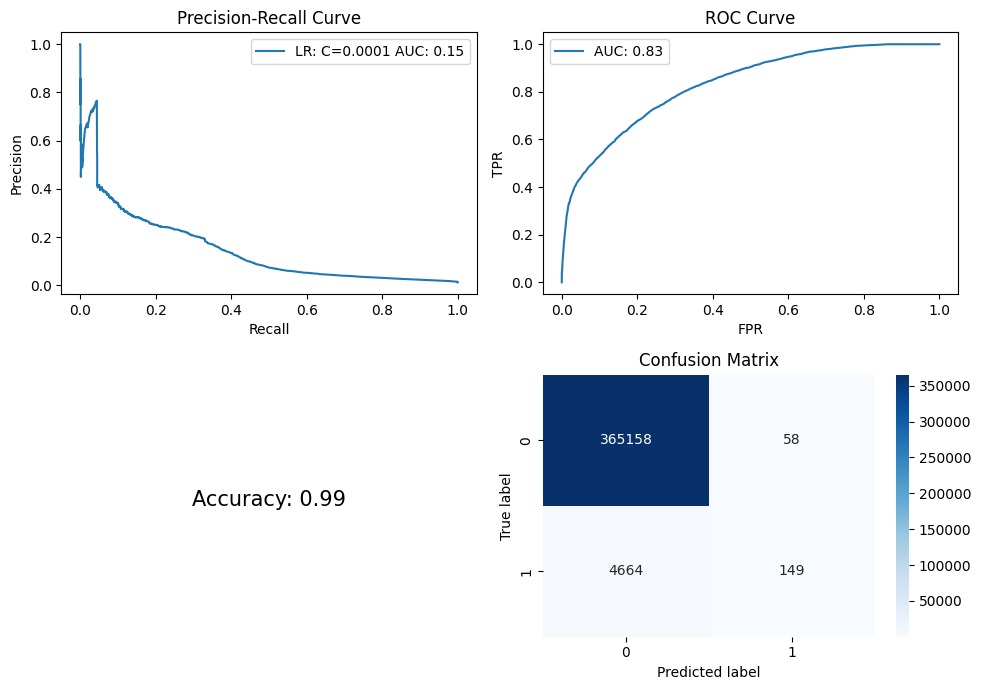

In [204]:
train_cols = ["days_since_purchase_variant_id", "discount_pct", "std_days_to_buy_product_type", "count_pets", "set_as_regular", "avg_days_to_buy_product_type", "days_since_purchase_product_type", "user_order_seq", "avg_days_to_buy_variant_id", "abandoned_before", "global_popularity", "normalised_price", "ordered_before",]

regularization_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

best_auc = 0
best_c = None
best_model = None

for c in regularization_values:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l1',C=c, solver='liblinear')
    )
    lr.fit(X_train[train_cols], y_train)

    y_proba = lr.predict_proba(X_test[train_cols])[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_c = c
        best_model = lr

y_pred = best_model.predict_proba(X_test[train_cols])[:, 1]

plot_metrics(f"LR: C={best_c}", y_pred, y_test)

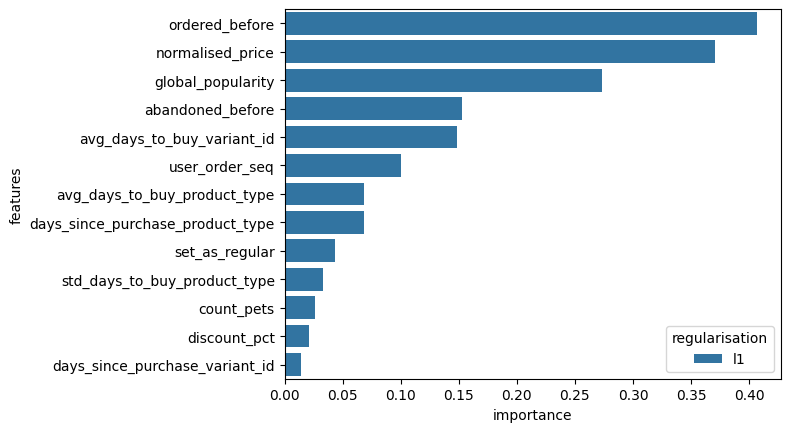

In [205]:
show_coeffs(X_train, y_train, train_cols, 'l1', 10, 'liblinear')

## Conclusions

En el transcurso de esta segunda práctica, logré desarrollar un modelo de manera eficiente y sencilla utilizando regresiones logísticas. Comencé con un análisis exhaustivo del conjunto de datos, atendiendo los requerimientos de preprocesamiento necesarios, tales como la eliminación de órdenes con menos de cinco ítems. Luego, establecí un modelo base que me sirvió de comparación para las regresiones logísticas aplicadas, tanto Lasso como Ridge. Finalmente, a través del análisis de las curvas ROC y Precision-Recall, perfeccioné un modelo final listo para su implementación en producción.

A lo largo de este proceso, descubrí varios insights importantes:

- Se realiza una agrupación de user_id con varios variant_ids bajo un order_id, que representa los distintos pedidos de cada usuario en la misma fecha. Observé que hay una cantidad inusualmente baja de valores únicos en esta métrica para ser un supermercado, lo que me lleva a deducir que el usuario promedio tiende a agregar muchos productos en un mismo pedido, pero finalmente compra solo unos pocos.
- Al modelar, noté que el factor de regularización no es crucial, ya que todos los modelos presentaban el mismo valor de regularización, coincidiendo siempre con el último de la lista. Esto me indica que hay pocas posibilidades de sobreajuste en nuestros modelos.
- Al experimentar con diferentes regresiones para Ridge y Lasso con variables numéricas, descubrí que el modelo que más se acerca a las curvas ROC y Precision-Recall ideales es aquel que incluye más variables numéricas significativas. Esto se debe, probablemente, a que variables como los conteos de miembros familiares no son relevantes, o a la falta de datos suficientes para que lo sean.
- A pesar de los buenos resultados obtenidos, me gustaría explorar cómo podríamos mejorar este modelo mediante el Categorical Encoding de aquellas variables que no hemos considerado previamente.